# 第一版，可以导出最新一个表格中的图表

In [32]:
from selenium import webdriver
import time,re,os
from PIL import Image

headers = {'User-Agent': 'User-Agent:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36'}

def get_details(url):


    print('Open login page... {}'.format(url))
    driver = webdriver.PhantomJS()
    driver.maximize_window()
    driver.get(url) # 访问网页
    driver.find_element_by_id('userName').send_keys(username) # 提取账号输入框，并输入用户名
    driver.find_element_by_id('pwd').send_keys(password) # 提取密码输入框，并输入密码
    driver.find_element_by_id('btnLogin').submit() # 点击登陆按钮 
    print('Enter username and password to login... '.format(url))
    time.sleep(5)
    
    spreadsheet = driver.find_element_by_css_selector('.listItem.ui-draggable')
    report_name = spreadsheet.find_element_by_css_selector('.reportName').text
    report_url = spreadsheet.find_element_by_css_selector('.form-title a').get_attribute('href')
    report_id = re.search(r'report/(.+)\?groupid=',report_url).group(1)
    report_view = 'https://www.jsform.com/web/reportview/{}#'.format(report_id)
    print('Report name: {} \nReport id:{}'.format(report_name,report_id))
    driver.get(report_view)
    print('Open report page... {}'.format(report_view))
    time.sleep(2)
    print('Print spreadsheet screenshot...')
    driver.save_screenshot(r'spreadsheet_fullscreen.png')
    graph_list = driver.find_elements_by_css_selector('.widget.wgt_graph')
    number_list = driver.find_elements_by_css_selector('.widget.wgt_number')
    
    graphs = graph_list + number_list 
    graph_num = len(graphs)
    print('Report has {} graphs'.format(graph_num))
    
    print('Create director for saving graphs: {} '.format(report_name))
    path = report_name
    isExists = os.path.exists('{}'.format(path))
    if not isExists:
        os.makedirs(path)
    

    num = 1
    for graph in graphs:
        left = graph.location['x']
        top = graph.location['y']
        right = graph.location['x'] + graph.size['width']
        bottom = graph.location['y'] + graph.size['height']
        full_screen = Image.open(r'spreadsheet_fullscreen.png')
        im = full_screen.crop((left, top, right, bottom))
        name = '{}_{}.png'.format(report_name,num)
        print('Download pic: {}, {}/{}...'.format(name,num,graph_num))
        im.save(r'{}\{}'.format(report_name,name))         
        num += 1
    
    print('Downloading graph is over')

        

username = ''
password = '123456'
url = 'https://www.jsform.com/app/report/manage'
get_details(url)

Open login page... https://www.jsform.com/app/report/manage


c:\users\win7\appdata\local\programs\python\python36-32\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


Enter username and password to login... 
Report number: 1 
Report name: 1.17日 
Report id:5c40560cfc918f4b8710e5f7
Open report page... https://www.jsform.com/web/reportview/5c40560cfc918f4b8710e5f7#
Print spreadsheet screenshot...
Report has 13 graphs
Create director for saving graphs: 1.17日 
Download pic: 1.17日_1.png, 1/13...
Download pic: 1.17日_2.png, 2/13...
Download pic: 1.17日_3.png, 3/13...
Download pic: 1.17日_4.png, 4/13...
Download pic: 1.17日_5.png, 5/13...
Download pic: 1.17日_6.png, 6/13...
Download pic: 1.17日_7.png, 7/13...
Download pic: 1.17日_8.png, 8/13...
Download pic: 1.17日_9.png, 9/13...
Download pic: 1.17日_10.png, 10/13...
Download pic: 1.17日_11.png, 11/13...
Download pic: 1.17日_12.png, 12/13...
Download pic: 1.17日_13.png, 13/13...


In [50]:
num = [1,2,3,4,5]
print(type(num))
print(num[2])

for i in num(1,2):
    print(i)

<class 'list'>
3


TypeError: 'list' object is not callable

# 第二版，可以指定导出第几个表格中的图表

In [14]:
from selenium import webdriver
import time,re,os
from PIL import Image

headers = {'User-Agent': 'User-Agent:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36'}


def get_details(url,number =1):
    number = int(input('please enter report number: '))
    print('Open login page... {}'.format(url))
    driver = webdriver.PhantomJS()
    driver.maximize_window()
    driver.get(url) # 访问网页
    driver.find_element_by_id('userName').send_keys(username) # 提取账号输入框，并输入用户名
    driver.find_element_by_id('pwd').send_keys(password) # 提取密码输入框，并输入密码
    driver.find_element_by_id('btnLogin').submit() # 点击登陆按钮 
    print('Enter username and password to login... '.format(url))
    time.sleep(5)
    
    spreadsheet_list = driver.find_elements_by_css_selector('.listItem.ui-draggable')
    
    spreadsheet = spreadsheet_list[number-1] 

    report_name = spreadsheet.find_element_by_css_selector('.reportName').text
    report_url = spreadsheet.find_element_by_css_selector('.form-title a').get_attribute('href')
    report_id = re.search(r'report/(.+)\?groupid=',report_url).group(1)
    report_view = 'https://www.jsform.com/web/reportview/{}#'.format(report_id)
    print('Report name: {} \nReport id:{}'.format(report_name,report_id))
              
    
    driver.get(report_view)
    print('Open report page... {}'.format(report_view))
    time.sleep(2)
    print('Print spreadsheet screenshot...')
    driver.save_screenshot(r'spreadsheet_fullscreen.png')
    graph_list = driver.find_elements_by_css_selector('.widget.wgt_graph')
    number_list = driver.find_elements_by_css_selector('.widget.wgt_number')
    graphs = graph_list + number_list 
    graph_num = len(graphs)
    print('Report has {} graphs'.format(graph_num))
    
    driver.save_screenshot(r'spreadsheet_fullscreen.png')
    graph_list = driver.find_elements_by_css_selector('.wgtContainer')
    number_list = driver.find_elements_by_css_selector('.widget.wgt_number')
    
    graphs = graph_list + number_list 
    graph_num = len(graphs)
    print('Report has {} graphs'.format(graph_num))
    
    print('Create director for saving graphs: {} '.format(report_name))
    path = report_name
    isExists = os.path.exists('{}'.format(path))
    if not isExists:
        os.makedirs(path)
    

    num = 1
    for graph in graphs:
        left = graph.location['x']
        top = graph.location['y']
        right = graph.location['x'] + graph.size['width']
        bottom = graph.location['y'] + graph.size['height']
        full_screen = Image.open(r'spreadsheet_fullscreen.png')
        im = full_screen.crop((left, top, right, bottom))
        name = '{}_{}.png'.format(report_name,num)
        print('Download pic: {}, {}/{}...'.format(name,num,graph_num))
        im.save(r'{}/{}'.format(report_name,name))         
        num += 1
    
    print('Downloading graph is over')
        

username = '13823350648'
password = '123456'
url = 'https://www.jsform.com/app/report/manage'
number = 1
get_details(url,number)

please enter report number: 1
Open login page... https://www.jsform.com/app/report/manage
Enter username and password to login... 
Report name: 1.19日 
Report id:5c42dc32fc918f0bcc1fa3ac
Open report page... https://www.jsform.com/web/reportview/5c42dc32fc918f0bcc1fa3ac#
Print spreadsheet screenshot...
Report has 14 graphs
Report has 14 graphs
Create director for saving graphs: 1.19日 
Download pic: 1.19日_1.png, 1/14...
Download pic: 1.19日_2.png, 2/14...
Download pic: 1.19日_3.png, 3/14...
Download pic: 1.19日_4.png, 4/14...
Download pic: 1.19日_5.png, 5/14...
Download pic: 1.19日_6.png, 6/14...
Download pic: 1.19日_7.png, 7/14...
Download pic: 1.19日_8.png, 8/14...
Download pic: 1.19日_9.png, 9/14...
Download pic: 1.19日_10.png, 10/14...
Download pic: 1.19日_11.png, 11/14...
Download pic: 1.19日_12.png, 12/14...
Download pic: 1.19日_13.png, 13/14...
Download pic: 1.19日_14.png, 14/14...


In [13]:
import re
report_view = 'https://www.jsform.com/web/reportview/5c40560cfc918f4b8710e5f7#'

url = 'https://www.jsform.com/app/report/5c40560cfc918f4b8710e5f7?groupid='
report_id = re.search(r'report/(.+)\?groupid=',url)
print(report_id.group(1))

report_view = 'https://www.jsform.com/web/reportview/{}#'.format(report_id.group(1))
print(report_view)

5c40560cfc918f4b8710e5f7
https://www.jsform.com/web/reportview/5c40560cfc918f4b8710e5f7#


# excel 表格按字段分类

In [4]:
import pandas as pd
file_name = 'test.csv'

data = pd.read_csv(file_name,encoding="utf-8")
cols = data.columns 
print(cols[17])

print(data[cols[17]])

17.请问您对我们的产品和服务是否还有其它建议或者意见？
0                                                  非常满意
1                                           服务设施做得还不够细致
2                                   吧台服务需要改善，不热情，没有微笑服务
3                                      建议设置一下户外可以晒太阳的位子
4                                                  品尝面包
5                                  冰淇淋溶化太快了，建议用容器装着，需改良
6                                          价格可以便宜些?服务满意
7                                              上饮料的速度偏慢
8                                           很好，很满意 暂时没有
9                                       冰激凌需要用小容器装，融化太快
10                                              希望越做越好！
11                                       价格不要太高，入会员门槛高，
12                                         牛角包黄油不足，味道一般
13                    作为一个超级牛角包吃货，你们的牛角包做的外观还可以，味道差的有点远
14                                                 非常满意
15                                单份太大了，可以考虑降低价格 缩小size
16                                    三文治加热时间较短，中间还是冷的。
17                 

In [76]:
import csv
import pandas as pd

def field_classify(file_name,save_file,fields):
    
    with open(file_name,'r',encoding='utf-8') as csvfile:
        fields_dic = {}
        for i in fields:
            fields_dic[i] = []
        reader = csv.reader(csvfile)
        sentences = [row[17] for row in reader][1:]
        copy = sentences[:]

        for sentence in copy:
            for i in fields:
                if i in sentence:
                    try:
                        fields_dic[i].append(sentence)
                        sentences.remove(sentence)
                        print('adding sentence to filed [{}]: {} '.format(i,sentence))
                    except ValueError:
                        continue
        fields_dic['其他'].extend(sentences)        
        print(fields_dic)
        writein_csv(save_file,fields_dic)
            
def writein_csv(save_file,fields_dic):

    #字典中的key值即为csv中列名
    for i in fields_dict:
        dataframe = pd.DataFrame({i:fields_dict[i]})  
        #将DataFrame存储为csv,index表示是否显示行名，default=True
        dataframe.to_csv(save_file,index=False,sep=',',encoding = "utf-8",mode='a')

        
# 列表靠前位置优先级越高，新添加字段必须排在 '其他' 前面
file_name = 'test.csv'
fields = ['面包','价格','口味','饮品','三文治','牛角包','冰淇淋','满意','甜品','咖啡','茶','服务','加热','排队','无','其他']
save_file = 'test_result.csv'


field_classify(file_name,save_file,fields)

adding sentence to filed [满意]: 非常满意 
adding sentence to filed [服务]: 服务设施做得还不够细致 
adding sentence to filed [服务]: 吧台服务需要改善，不热情，没有微笑服务 
adding sentence to filed [面包]: 品尝面包 
adding sentence to filed [冰淇淋]: 冰淇淋溶化太快了，建议用容器装着，需改良 
adding sentence to filed [价格]: 价格可以便宜些?服务满意 
adding sentence to filed [满意]: 很好，很满意 暂时没有 
adding sentence to filed [价格]: 价格不要太高，入会员门槛高， 
adding sentence to filed [牛角包]: 牛角包黄油不足，味道一般 
adding sentence to filed [牛角包]: 作为一个超级牛角包吃货，你们的牛角包做的外观还可以，味道差的有点远 
adding sentence to filed [满意]: 非常满意 
adding sentence to filed [价格]: 单份太大了，可以考虑降低价格 缩小size 
adding sentence to filed [三文治]: 三文治加热时间较短，中间还是冷的。 
adding sentence to filed [无]: 无 
adding sentence to filed [加热]: 三明治加热后会和包装纸粘住 不好食用 
adding sentence to filed [面包]: 面包切片可以更小一点...方便女生吃 
adding sentence to filed [面包]: 面包体积太大，导致有些外貌不佳， 
adding sentence to filed [满意]: 非常满意 
adding sentence to filed [无]: 无 
adding sentence to filed [价格]: 希望品种更多，价格优惠些。 
adding sentence to filed [服务]: 服务员跟进服务有待加强 
adding sentence to filed [面包]: 缴费和切面包的地方距

In [70]:
fields_dict = {'面包': ['品尝面包', '面包切片可以更小一点...方便女生吃', '面包体积太大，导致有些外貌不佳，', '缴费和切面包的地方距离较远，虽然有两个缴费的地方但是切面包的只有一个', '增加面包打包处，减少排队', '看到做面包工作人员没带手套', '应该把面包里面的成分写出来。有些人可能对某一样食物过敏或讨厌(', '感觉第一次来有点不太清楚哪里可以买单面包啥的，有点乱，在切面包的地方还有人插队？！'], '价格': ['价格可以便宜些?服务满意', '价格不要太高，入会员门槛高，', '单份太大了，可以考虑降低价格 缩小size', '希望品种更多，价格优惠些。', '价格比较贵', '会员价格可以更优惠一点'], '口味': ['口味比较平常'], '饮品': ['饮品款式少'], '三文治': ['三文治加热时间较短，中间还是冷的。'], '牛角包': ['牛角包黄油不足，味道一般', '作为一个超级牛角包吃货，你们的牛角包做的外观还可以，味道差的有点远'], '冰淇淋': ['冰淇淋溶化太快了，建议用容器装着，需改良', '整体感觉很棒，买了3个冰淇淋，如果都一样好看就好了，上面的巧克力一般，换一个好点的'], '满意': ['非常满意', '价格可以便宜些?服务满意', '很好，很满意 暂时没有', '非常满意', '非常满意', '很满意～', '很满意', '还是很满意的'], '甜品': [], '咖啡': ['发票开票时间比较长，然后等咖啡时间太慢了'], '茶': [], '服务': ['服务设施做得还不够细致', '吧台服务需要改善，不热情，没有微笑服务', '价格可以便宜些?服务满意', '服务员跟进服务有待加强', '服务态度很好，希望越来越优秀', '产品和服务都很好，但是希望可以增加户外座位.'], '加热': ['三文治加热时间较短，中间还是冷的。', '三明治加热后会和包装纸粘住 不好食用', '加热要下楼太麻烦', '暗送秋波加热的太干了，加热的操作需要规范'], '排队': ['增加面包打包处，减少排队'], '无': ['无', '无', '无', '无', '无', '无', '无', '无', '无', '暂无', '无', '暂无', '无', '无'], '其他': ['建议设置一下户外可以晒太阳的位子', '上饮料的速度偏慢', '冰激凌需要用小容器装，融化太快', '希望越做越好！', '没有', '没有', '客户参与感不会太强', '桌上有餐牌更好', '我要折扣', '沙发太矮', '速度太慢', '希望包点的种类越来越丰富。', '有建议', '每个东西的分量有点大。我对很多东西感兴趣但是食量没那么大吃不完。所以很可惜只能买了一份。', '喝的选择还是太少', '没有w', '挺好', '没有', '不错的商业模式', '没有意见', '莫得', '?有', '', '?有', '完美', '没有', '有点吵闹', '这杯喝的有点涩 可以做甜一点', '太贵了', '没有', '希望开分店', '没有', '有一些互动的体验会更好', '多来几次再发现了告诉你哈哈哈', '分布有指引', '不知道为什么叫张国荣芝士，感觉冻过头了，不怎么好吃，提拉米苏还行', '太干了', '可以贵点', '没有引导字', '没有', '超好', '电子发票获取需要更便捷', '挺好的', '拿铁太苦，少了香味。蛋糕都是冷藏孩子吃不了，希望有常温的蛋糕。希望有量少的饼干，可以一次不用买一盒。', '非常好', '非常棒', '没有', '光线太暗', '客服再热情点']}

print(len(fields_dict))

for i in fields_dict:
    print({i:fields_dict[i]})
   

16
{'面包': ['品尝面包', '面包切片可以更小一点...方便女生吃', '面包体积太大，导致有些外貌不佳，', '缴费和切面包的地方距离较远，虽然有两个缴费的地方但是切面包的只有一个', '增加面包打包处，减少排队', '看到做面包工作人员没带手套', '应该把面包里面的成分写出来。有些人可能对某一样食物过敏或讨厌(', '感觉第一次来有点不太清楚哪里可以买单面包啥的，有点乱，在切面包的地方还有人插队？！']}
{'价格': ['价格可以便宜些?服务满意', '价格不要太高，入会员门槛高，', '单份太大了，可以考虑降低价格 缩小size', '希望品种更多，价格优惠些。', '价格比较贵', '会员价格可以更优惠一点']}
{'口味': ['口味比较平常']}
{'饮品': ['饮品款式少']}
{'三文治': ['三文治加热时间较短，中间还是冷的。']}
{'牛角包': ['牛角包黄油不足，味道一般', '作为一个超级牛角包吃货，你们的牛角包做的外观还可以，味道差的有点远']}
{'冰淇淋': ['冰淇淋溶化太快了，建议用容器装着，需改良', '整体感觉很棒，买了3个冰淇淋，如果都一样好看就好了，上面的巧克力一般，换一个好点的']}
{'满意': ['非常满意', '价格可以便宜些?服务满意', '很好，很满意 暂时没有', '非常满意', '非常满意', '很满意～', '很满意', '还是很满意的']}
{'甜品': []}
{'咖啡': ['发票开票时间比较长，然后等咖啡时间太慢了']}
{'茶': []}
{'服务': ['服务设施做得还不够细致', '吧台服务需要改善，不热情，没有微笑服务', '价格可以便宜些?服务满意', '服务员跟进服务有待加强', '服务态度很好，希望越来越优秀', '产品和服务都很好，但是希望可以增加户外座位.']}
{'加热': ['三文治加热时间较短，中间还是冷的。', '三明治加热后会和包装纸粘住 不好食用', '加热要下楼太麻烦', '暗送秋波加热的太干了，加热的操作需要规范']}
{'排队': ['增加面包打包处，减少排队']}
{'无': ['无', '无', '无', '无', '无', '无', '无', '无', '无', '暂无', '无', '暂无', '无', '无']}
{'其他': ['建

In [80]:
import csv


def get_info(file_name):
    
    with open(file_name,'r',encoding='utf-8') as csvfile:
  
        reader = csv.reader(csvfile)
        call_status = [row[16] for row in reader][1:]
        all_calls = len(call_status)




file_name = r'通话记录2019-01-191547894392700.csv'

get_info(file_name)

['不在服务时间', '不在服务时间', '接通', 'IVR中放弃', '接通', '接通', '接通', '接通', '接通', '接通', 'IVR中放弃', '接通', '接通', 'IVR中放弃', '接通', '接通', '接通', '接通', '接通', '接通', '不在服务时间', '不在服务时间', '不在服务时间', '不在服务时间', '不在服务时间', '不在服务时间', '不在服务时间', 'IVR中放弃', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '接通', 'IVR中放弃', '接通', '接通', '接通', 'IVR中放弃', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '不在服务时间', '不在服务时间', '不在服务时间', '接通', '接通', '接通', 'IVR中放弃', '接通', '接通', '接通', 'IVR中放弃', '接通', 'IVR中放弃', '接通', '接通', '接通', 'IVR中放弃', '接通', '接通', '不在服务时间', '不在服务时间', 'IVR中放弃', '接通', '接通', '接通', '接通', '接通', 'IVR中放弃', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '不在服务时间', '不在服务时间', '不在服务时间', '不在服务时间', '不在服务时间', 'IVR中放弃', 'IVR中放弃', 'IVR中放弃', '接通', '接通', 'IVR中放弃', '接通', 'IVR中放弃', 'IVR中放弃', '接通', '接通', '不在服务时间', '不在服务时间', '接通', '接通', 'IVR中放弃', 'IVR中放弃', '接通', 'IVR中放弃', '接通', '接通', '接通', '接通', '无人应答', '接通', 'IVR中放弃', '接通', '接通', '无人应答', '无客服在线', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '接通', '接通'

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_name = r'通话记录2019-01-191547894392700.csv'

data = pd.read_csv(file_name,encoding='utf-8')
fields = data.columns.tolist()
print('所有字段: {}'.format(fields))

all_status = data['接听状态']
print('接听状态: {}'.format(set(all_status)))

all_calls = len(data['接听状态'])
print('话务总量: {}'.format(all_calls))

service_call = len(all_status[all_status != '不在服务时间'])
print('服务时间内话务总量: {}'.format(service_call))

out_service = len(all_status[all_status == '不在服务时间'])
print('服务时间外话务总量: {}'.format(out_service))

if service_call + out_service != all_calls:
    print('有问题,服务时间内话务总量和服务时间外话务总量之和不等于话务总量')
    


所有字段: ['通话ID', '类型', '开启服务时间', '结束服务时间', '服务时长', '通话时长', '排队时长', '振铃时长', '主叫号码', '被叫号码', 'ivr语音导航', '溢出来源', '分流客服组', '接待客服', '客服账号', '重复咨询', '接听状态', '满意度', '处理时长', '访客用户名', '等级', '邮箱', '号码归属地', '一级分类', '二级分类', '三级分类', '四级分类', '五级分类', '服务录音', '服务小记']
接听状态: {'无人应答', '队列中溢出', 'IVR中放弃', '无客服在线', '不在服务时间', '接通', '客服未接听', '无法接通'}
话务总量: 164
服务时间内话务总量: 137
服务时间外话务总量: 27


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_name = r'通话记录2019-01-191547894392700.csv'

data = pd.read_csv(open(file_name,encoding='utf-8'))

print(data.head())

fields = data.columns.tolist()

print('所有字段: {}'.format(fields))

         通话ID  类型           开启服务时间           结束服务时间     服务时长     通话时长 排队时长  \
0  2319730669  呼入  2019/1/19 18:14  2019/1/19 18:15  0:00:23            --   
1  2319742297  呼入  2019/1/19 18:11  2019/1/19 18:12  0:00:13            --   
2  2319616866  呼入  2019/1/19 16:58  2019/1/19 17:00  0:01:40  0:01:05   --   
3  2319618500  呼入  2019/1/19 16:57  2019/1/19 16:58  0:00:23            --   
4  2319614549  呼入  2019/1/19 16:55  2019/1/19 16:57  0:01:19  0:00:50   --   

      振铃时长         主叫号码         被叫号码    ...      等级   邮箱 号码归属地 一级分类  二级分类  \
0       --  13630593590  75526814297    ...      普通  NaN  吉林长春  未分类         
1       --  13537707858  75526814297    ...      普通  NaN  广东深圳  未分类         
2  0:00:02  13534121806  75526814297    ...      普通  NaN  广东深圳   咨询  其它咨询   
3       --  13534121806  75526814297    ...      普通  NaN  广东深圳  未分类         
4  0:00:04  13823567300  75526814297    ...      普通  NaN  广东深圳   咨询  其它咨询   

  三级分类 四级分类 五级分类                                               服务录音 

所有字段: ['通话ID', '类型', '开启服务时间', '结束服务时间', '服务时长', '通话时长', '排队时长', '振铃时长', '主叫号码', '被叫号码', 'ivr语音导航', '溢出来源', '分流客服组', '接待客服', '客服账号', '重复咨询', '接听状态', '满意度', '处理时长', '访客用户名', '等级', '邮箱', '号码归属地', '一级分类', '二级分类', '三级分类', '四级分类', '五级分类', '服务录音', '服务小记']
接听状态: ['不在服务时间' '接通' 'IVR中放弃' '无人应答' '无客服在线' '队列中溢出' '无法接通' '客服未接听']
电话类型: ['呼入' '呼出']
一级分类: ['未分类' '咨询' '错误来电' '投诉' '合作' '建议']
接听状态: {'不在服务时间', '无法接通', '接通', '队列中溢出', 'IVR中放弃', '客服未接听', '无客服在线', '无人应答'}

--------01 基本运营情况分析----------

1.本周服务时间话务总量，呼入总量，呼出总量。
2.服务时间整体通话率：服务时间接通电话总数（状态仅为“接通“/服务时间总话务量。
3.服务时间呼损率（去除“接通”状态都为呼损）：服务时间呼损总数/服务时间呼入总量。

话务总量: 167
服务时间内话务总量: 137
服务时间外话务总量: 30
服务时间内呼入总量: 98
服务时间内呼出总量: 39
服务时间内接通总量: 106 
服务时间内整体通话率: 77.37%
服务时间内呼损总量: 29 
服务时间内呼损率: 21.17%

--------02 呼损原因分析----------

1.本周服务时间呼损总量。
2.呼损类型分类。（去除接通状态的所有其他状态，饼状分类）

服务时间内呼损总量: 29 
服务时间内呼损率: 21.17% 
呼损类型分类: ['IVR中放弃' '无客服在线' '队列中溢出' '无法接通' '客服未接听']
呼损类型比例: [23, 3, 1, 1, 1]
saving figure ...


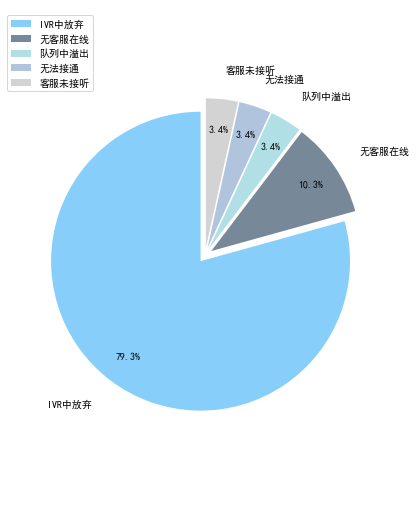

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_name = r'通话记录2019-01-221548157271574.csv'

data = pd.read_csv(open(file_name,encoding='utf-8'))
fields = data.columns.tolist()

print('所有字段: {}'.format(fields))
print('接听状态: {}'.format(data['接听状态'].unique()))
print('电话类型: {}'.format(data['类型'].unique()))
print('一级分类: {}'.format(data['一级分类'].unique()))
call_status = data['接听状态']
print('接听状态: {}'.format(set(call_status)))

print('\n--------01 基本运营情况分析----------')
print(
'''
1.本周服务时间话务总量，呼入总量，呼出总量。
2.服务时间整体通话率：服务时间接通电话总数（状态仅为“接通“/服务时间总话务量。
3.服务时间呼损率（去除“接通”状态都为呼损）：服务时间呼损总数/服务时间呼入总量。
''')


all_calls = len(data['接听状态'])
print('话务总量: {}'.format(all_calls))
service_call = len(call_status[call_status != '不在服务时间'])
print('服务时间内话务总量: {}'.format(service_call))
out_service = len(call_status[call_status == '不在服务时间'])
print('服务时间外话务总量: {}'.format(out_service))
if service_call + out_service != all_calls:
    print('有问题,服务时间内话务总量和服务时间外话务总量之和不等于话务总量')


data_section = data[['接听状态','类型','一级分类']]

# 去掉不在服务时间的数据
data_service_section = data_section[data_section['接听状态'] != '不在服务时间']
#print(data_service_section.head())

call_in = len(data_service_section['类型'][data_service_section['类型'] == '呼入'])
call_out = len(data_service_section['类型'][data_service_section['类型'] == '呼出'])
print('服务时间内呼入总量: {}'.format(call_in))
print('服务时间内呼出总量: {}'.format(call_out))

through_call = len(data_service_section['接听状态'][data_service_section['接听状态'] == '接通'])
through_rate = through_call/service_call*100
print('服务时间内接通总量: {} \n服务时间内整体通话率: {:.2f}%'.format(through_call,through_rate))

lose_call = (data_service_section[(data_service_section['接听状态']!= '接通') & (data_service_section['接听状态']!= '无人应答')])['接听状态']
lose_call_number = len(lose_call)
lose_type = lose_call.unique()
lose_rate = lose_call_number/service_call*100
print('服务时间内呼损总量: {} \n服务时间内呼损率: {:.2f}%'.format(lose_call_number,lose_rate))

print('\n--------02 呼损原因分析----------')
print(
'''
1.本周服务时间呼损总量。
2.呼损类型分类。（去除接通状态的所有其他状态，饼状分类）
''')

lose_call_list = [len(data_service_section['接听状态'][data_service_section['接听状态'] == i]) for i in lose_type]
print('服务时间内呼损总量: {} \n服务时间内呼损率: {:.2f}% \n呼损类型分类: {}\n呼损类型比例: {}'.format(lose_call_number,lose_rate,lose_type,lose_call_list))  


plt.rcParams['font.sans-serif'] = ['SimHei']# 解决matplotlib中文乱码问题,只在Windows下可以

#调节图形大小，宽，高
plt.figure(figsize=(6,9))
#定义饼状图的标签，标签是列表
labels = lose_type
#每个标签占多大，会自动去算百分比
sizes = lose_call_list
colors = ['lightskyblue','lightslategray','powderblue','lightsteelblue','lightgray','lavender','lavenderblush','lightpink','navajowhite']
explode = (0.05,)*len(labels)
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors[:len(labels)],
                                labeldistance = 1.2,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.8)

#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

#改变文本的大小
#方法是把每一个text遍历。调用set_size方法设置它的属性
for t in l_text:
    t.set_size=(30)
for t in p_text:
    t.set_size=(20)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
# loc: 表示legend的位置，包括'upper right','upper left','lower right','lower left'等
# bbox_to_anchor: 表示legend距离图形之间的距离，当出现图形与legend重叠时，可使用bbox_to_anchor进行调整legend的位置
# 由两个参数决定，第一个参数为legend距离左边的距离，第二个参数为距离下面的距离

#plt.show()

plt.savefig(r'lose_call_analysis.png', dpi = 400, bbox_inches = 'tight')

print('saving figure ...')

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_name = r'通话记录2019-01-221548157271574.csv'

data = pd.read_csv(open(file_name,encoding='utf-8'))
fields = data.columns.tolist()

print('所有字段: {}'.format(fields))
print('接听状态: {}'.format(data['接听状态'].unique()))
print('电话类型: {}'.format(data['类型'].unique()))
print('一级分类: {}'.format(data['一级分类'].unique()))
call_status = data['接听状态']
print('接听状态: {}'.format(set(call_status)))

print('\n--------01 基本运营情况分析----------')
print(
'''
1.本周服务时间话务总量，呼入总量，呼出总量。
2.服务时间整体通话率：服务时间接通电话总数（状态仅为“接通“/服务时间总话务量。
3.服务时间呼损率（去除“接通”状态都为呼损）：服务时间呼损总数/服务时间呼入总量。
''')


all_calls = len(data['接听状态'])
print('话务总量: {}'.format(all_calls))
service_call = len(call_status[call_status != '不在服务时间'])
print('服务时间内话务总量: {}'.format(service_call))
out_service = len(call_status[call_status == '不在服务时间'])
print('服务时间外话务总量: {}'.format(out_service))
if service_call + out_service != all_calls:
    print('有问题,服务时间内话务总量和服务时间外话务总量之和不等于话务总量')


data_section = data[['接听状态','类型','一级分类']]

# 去掉不在服务时间的数据
data_service_section = data_section[data_section['接听状态'] != '不在服务时间']
#print(data_service_section.head())

call_in = len(data_service_section['类型'][data_service_section['类型'] == '呼入'])
call_out = len(data_service_section['类型'][data_service_section['类型'] == '呼出'])
print('服务时间内呼入总量: {}'.format(call_in))
print('服务时间内呼出总量: {}'.format(call_out))

through_call = len(data_service_section['接听状态'][data_service_section['接听状态'] == '接通'])
through_rate = through_call/service_call*100
print('服务时间内接通总量: {} \n服务时间内整体通话率: {:.2f}%'.format(through_call,through_rate))

lose_call = (data_service_section[(data_service_section['接听状态']!= '接通') & (data_service_section['接听状态']!= '无人应答')])['接听状态']
print(lose_call)      


所有字段: ['通话ID', '类型', '开启服务时间', '结束服务时间', '服务时长', '通话时长', '排队时长', '振铃时长', '主叫号码', '被叫号码', 'ivr语音导航', '溢出来源', '分流客服组', '接待客服', '客服账号', '重复咨询', '接听状态', '满意度', '处理时长', '访客用户名', '等级', '邮箱', '号码归属地', '一级分类', '二级分类', '三级分类', '四级分类', '五级分类', '服务录音', '服务小记']
接听状态: ['不在服务时间' '接通' 'IVR中放弃' '无人应答' '无客服在线' '队列中溢出' '无法接通' '客服未接听']
电话类型: ['呼入' '呼出']
一级分类: ['未分类' '咨询' '错误来电' '投诉' '合作' '建议']
接听状态: {'不在服务时间', '无法接通', '接通', '队列中溢出', 'IVR中放弃', '客服未接听', '无客服在线', '无人应答'}

--------01 基本运营情况分析----------

1.本周服务时间话务总量，呼入总量，呼出总量。
2.服务时间整体通话率：服务时间接通电话总数（状态仅为“接通“/服务时间总话务量。
3.服务时间呼损率（去除“接通”状态都为呼损）：服务时间呼损总数/服务时间呼入总量。

话务总量: 167
服务时间内话务总量: 137
服务时间外话务总量: 30
服务时间内呼入总量: 98
服务时间内呼出总量: 39
服务时间内接通总量: 106 
服务时间内整体通话率: 77.37%
6      IVR中放弃
13     IVR中放弃
16     IVR中放弃
30     IVR中放弃
43     IVR中放弃
47     IVR中放弃
66     IVR中放弃
70     IVR中放弃
72     IVR中放弃
76     IVR中放弃
81     IVR中放弃
87     IVR中放弃
101    IVR中放弃
102    IVR中放弃
103    IVR中放弃
106    IVR中放弃
108    IVR中放弃
109    IVR中放弃
116    IVR中放弃
117    IVR中放弃
119    IVR中放弃
126    I